# Linear Regression

$$y = mx + c$$
Mean squre error: $$\frac{1}{N} \sum_{i=1} ^ {n} (y_{i} - (mx_{i} + c))^{2}$$

Training:
* Initialize slope as zero
* Initialize intercept as zero

Given a data point:
* Predict result by using y = mx + c
* Calculate error
* Use gradient descent to figure out new weights and bias values
* Repeat n times

Testing: <br>
* Given a data point: Put in the values from the data point into the equation y = mx + c

$$\frac{dJ}{dm} = \frac{1}{N}\sum _{i=1} ^{n} 2x_{i}(\hat{y} - y_{i})$$

$$\frac{dJ}{dc} = \frac{1}{N}\sum _{i=1} ^{n}(\hat{y} - y_{i})$$

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self, learning_rate, number_of_iterations):
        """
        Initialize the linear regression model with a learning rate and number of iterations.

        Parameters:
        - learning_rate: The learning rate for gradient descent.
        - number_of_iterations: The number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate 
        self.number_of_iterations = number_of_iterations
        self.slope = None
        self.intercept = None
    
    def fit(self, X, y):
        """
        Fit the linear regression model to the training data.

        Parameters:
        - X: The input features of the training data.
        - y: The target values of the training data.
        """
        n_samples, n_features = X.shape
        self.slope = np.zeros(n_features)
        self.intercept = 0
        for _ in range(self.number_of_iterations):
            # Perform gradient descent for the specified number of iterations
            y_predict = np.dot(X, self.slope) + self.intercept
            # Calculate the predicted values based on the current model parameters
            dm = (1/n_samples) * np.dot(X.T, (y_predict - y))
            # Calculate the derivative of the cost function with respect to the slope
            dc = (1/n_samples) * np.sum(y_predict - y)
            # Calculate the derivative of the cost function with respect to the intercept
            self.slope = self.slope - self.learning_rate * dm
            # Update the slope using the gradient descent update rule
            self.intercept = self.intercept - self.learning_rate * dc
            # Update the intercept using the gradient descent update rule

    def predict(self, X):
        """
        Make predictions for the given input data.

        Parameters:
        - X: The input features of the data points to predict.

        Returns:
        - y_predict: The predicted target values.
        """
        y_predict = np.dot(X, self.slope) + self.intercept
        # Calculate the predicted values based on the learned model parameters
        return y_predict

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

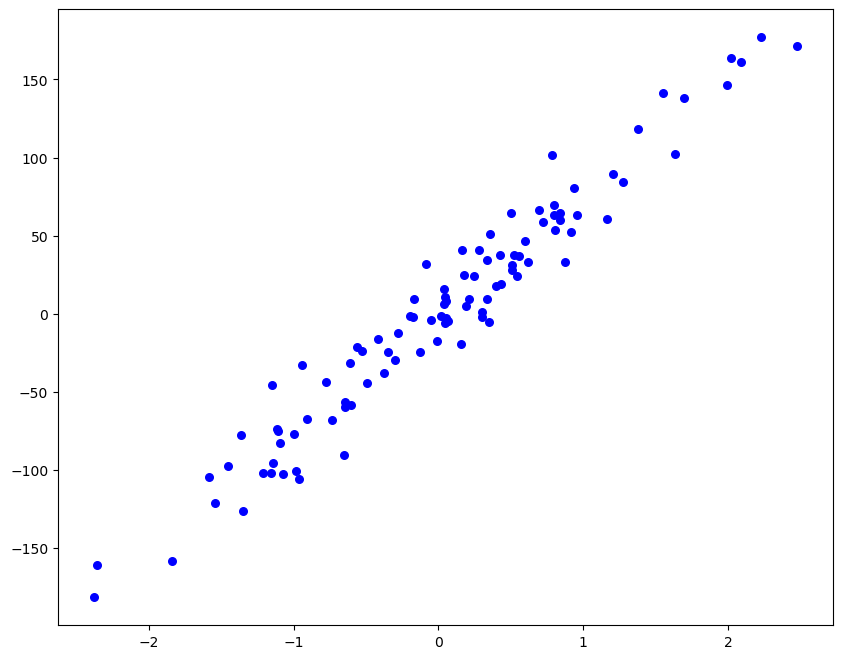

In [4]:
figure = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
plt.show()

In [5]:
regression = LinearRegression(0.1, 1000)
regression.fit(X_train, y_train)
predictions = regression.predict(X_test)

In [6]:
def mean_square_error(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)

In [7]:
mse = mean_square_error(y_test, predictions)
print(mse)

305.77413162286416


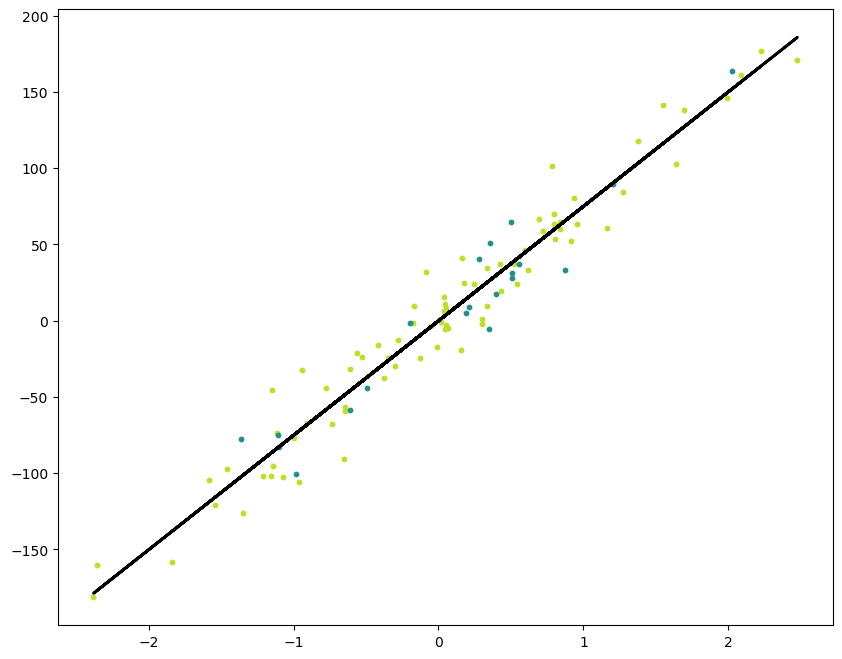

In [8]:
y_predicted_line = regression.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(10, 8))
m_1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m_2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_predicted_line, color='black', linewidth=2, label="Prediction")
plt.show()